In [1]:
import pickle
from tqdm import tqdm_notebook as tqdm
import pandas
import numpy
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [8]:
import os
entry_categories=dict()
for filename in tqdm(os.listdir('./data/dump')):
    if filename.startswith('metadata_'):
        data=pickle.load(open('./data/dump/%s'%filename,'rb'))
        for entry,meta_data in data.items():
            if meta_data['categories']==[]:
                continue
            entry_categories[entry]=meta_data['categories']

In [9]:
visit_count_df=pickle.load(open('./data/dump/merged_metadata.pkl','rb'))

In [10]:
visit_count_df['Title']=visit_count_df.index

In [11]:
visit_count_df.head()

,category_num,frequency,image_num,language_num,link_num,update,vandalism,in_degree,out_degree,page_len,Title
$1,4.0,7791.0,1.0,1.0,45.0,0.0,0.0,0.0,11.0,2476.0,$1
"$10,000_unsecured_visa_or_mastercards",0.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"$10,000_unsecured_visa_or_mastercards"
'O_Sole_Mio,0.0,897.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,25.0,'O_Sole_Mio
(Don't_Fear)_The_Reaper,14.0,970.0,9.0,9.0,443.0,17.0,0.0,40.0,170.0,26292.0,(Don't_Fear)_The_Reaper
(I_Can't_Get_No)_Satisfaction,49.0,667.0,11.0,31.0,590.0,10.0,0.0,71.0,228.0,37360.0,(I_Can't_Get_No)_Satisfaction


In [12]:
visit_count_df=visit_count_df[visit_count_df['Title'].isin(entry_categories)]

In [18]:
def seperate_list(array, bins = 10):
    arrary1 = sorted(array)
    cut = []
    delta = len(arrary1) // bins
    for j in range(0, bins):
        if len(cut)>0 and arrary1[delta * j]==cut[-1]:
            continue
        cut.append(arrary1[delta * j])
    cut.append(arrary1[-1])
    return cut

In [14]:
visit_count_df['frequency']=visit_count_df['frequency'].astype(int)
visit_count_df['in_degree']=visit_count_df['in_degree'].astype(int)
visit_count_df['out_degree']=visit_count_df['out_degree'].astype(int)

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas
import re
import os
from scipy.stats import pearsonr

In [21]:
visit_count_df['frequency_bin'] = pandas.cut(
    visit_count_df['frequency'],
    seperate_list(visit_count_df['frequency'].values, 20))
visit_count_df['out_degree_bin'] = pandas.cut(
    visit_count_df['out_degree'],
    seperate_list(visit_count_df['out_degree'].values, 20))
visit_count_df['in_degree_bin'] = pandas.cut(
    visit_count_df['in_degree'],
    seperate_list(visit_count_df['in_degree'].values, 20))

In [86]:
interested_columns=list(visit_count_df.columns)[2:-4]

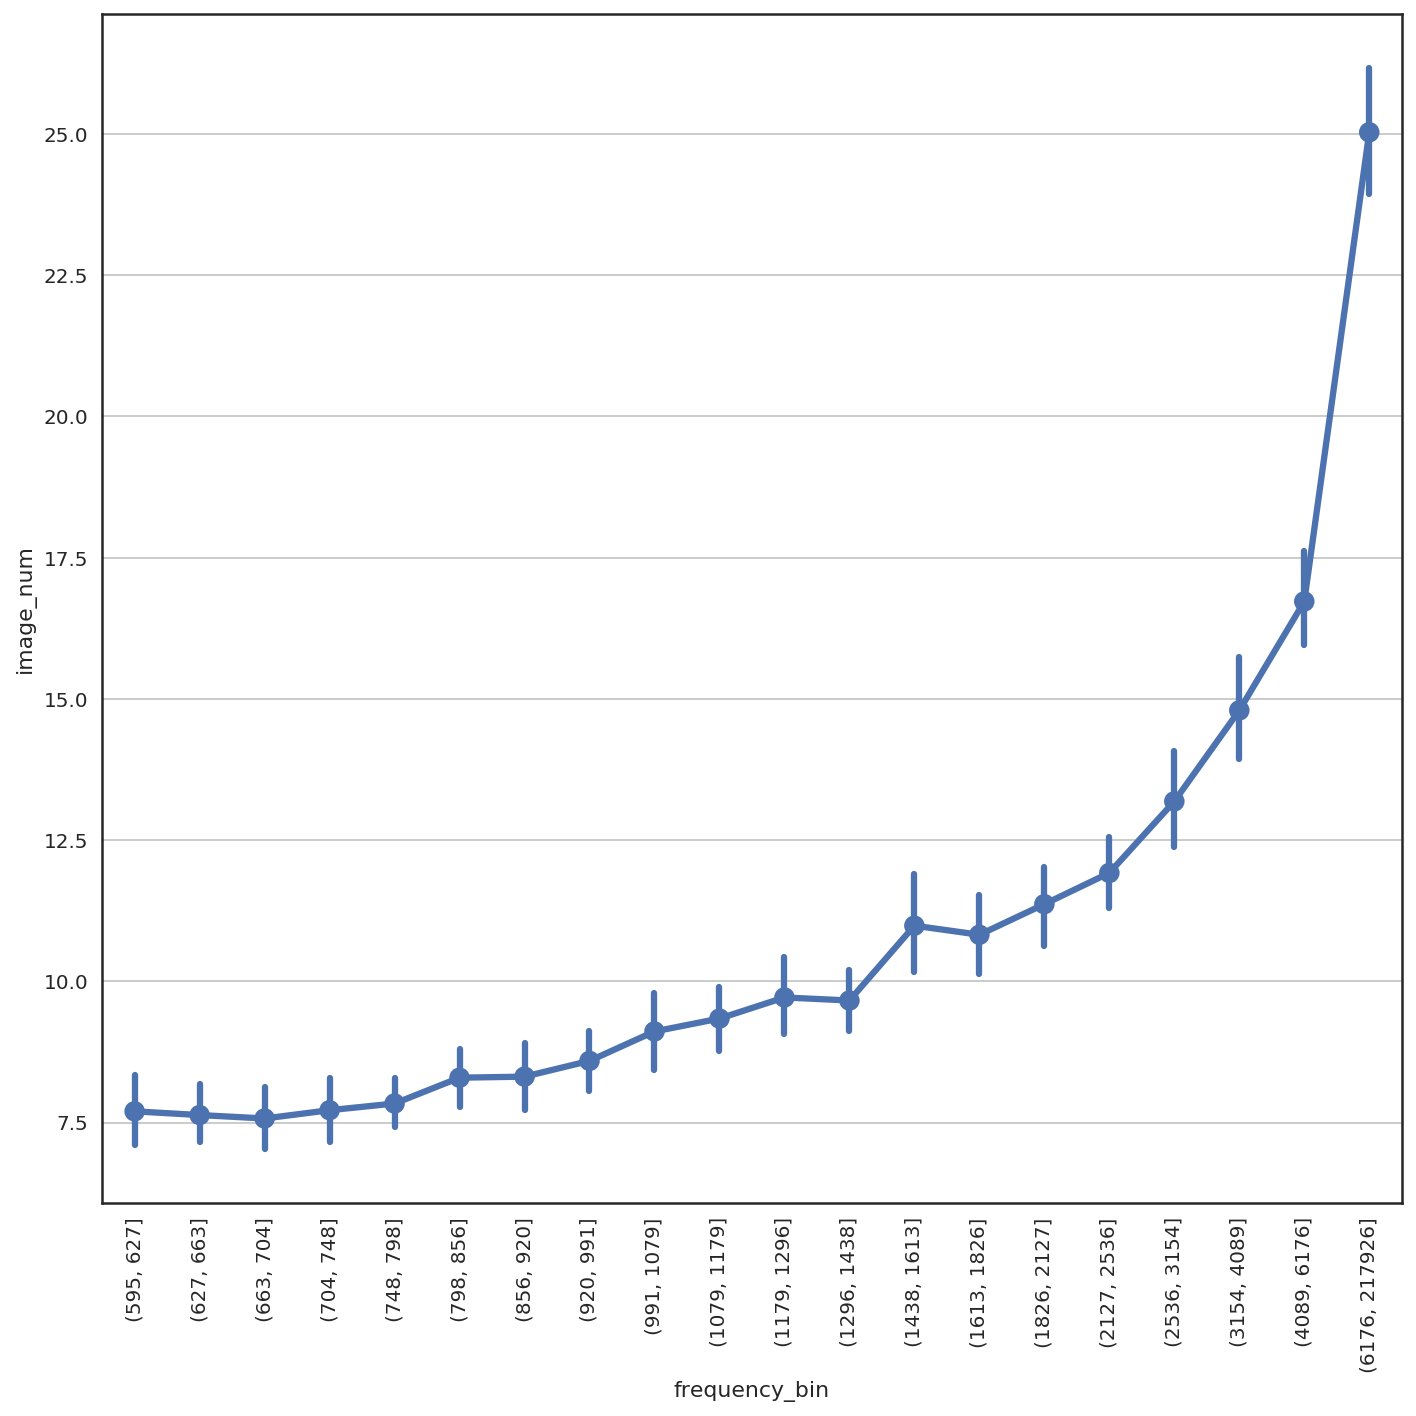

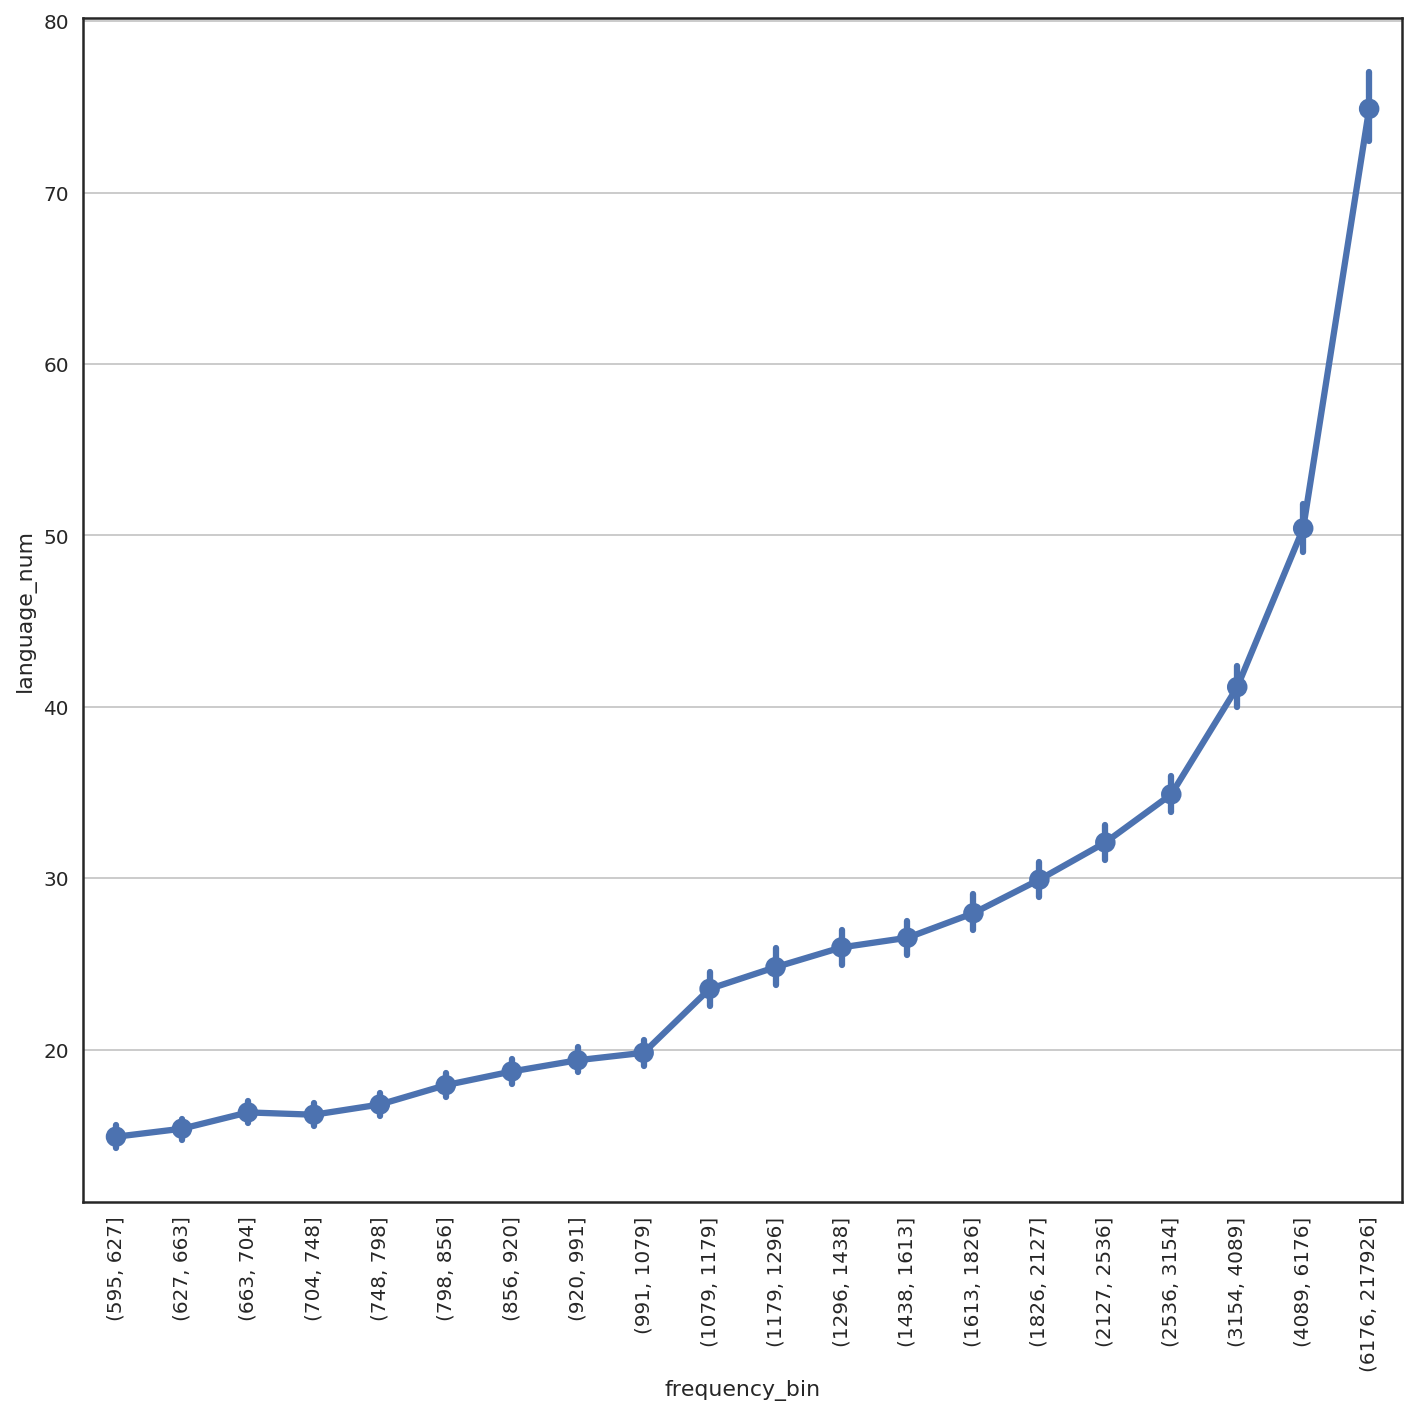

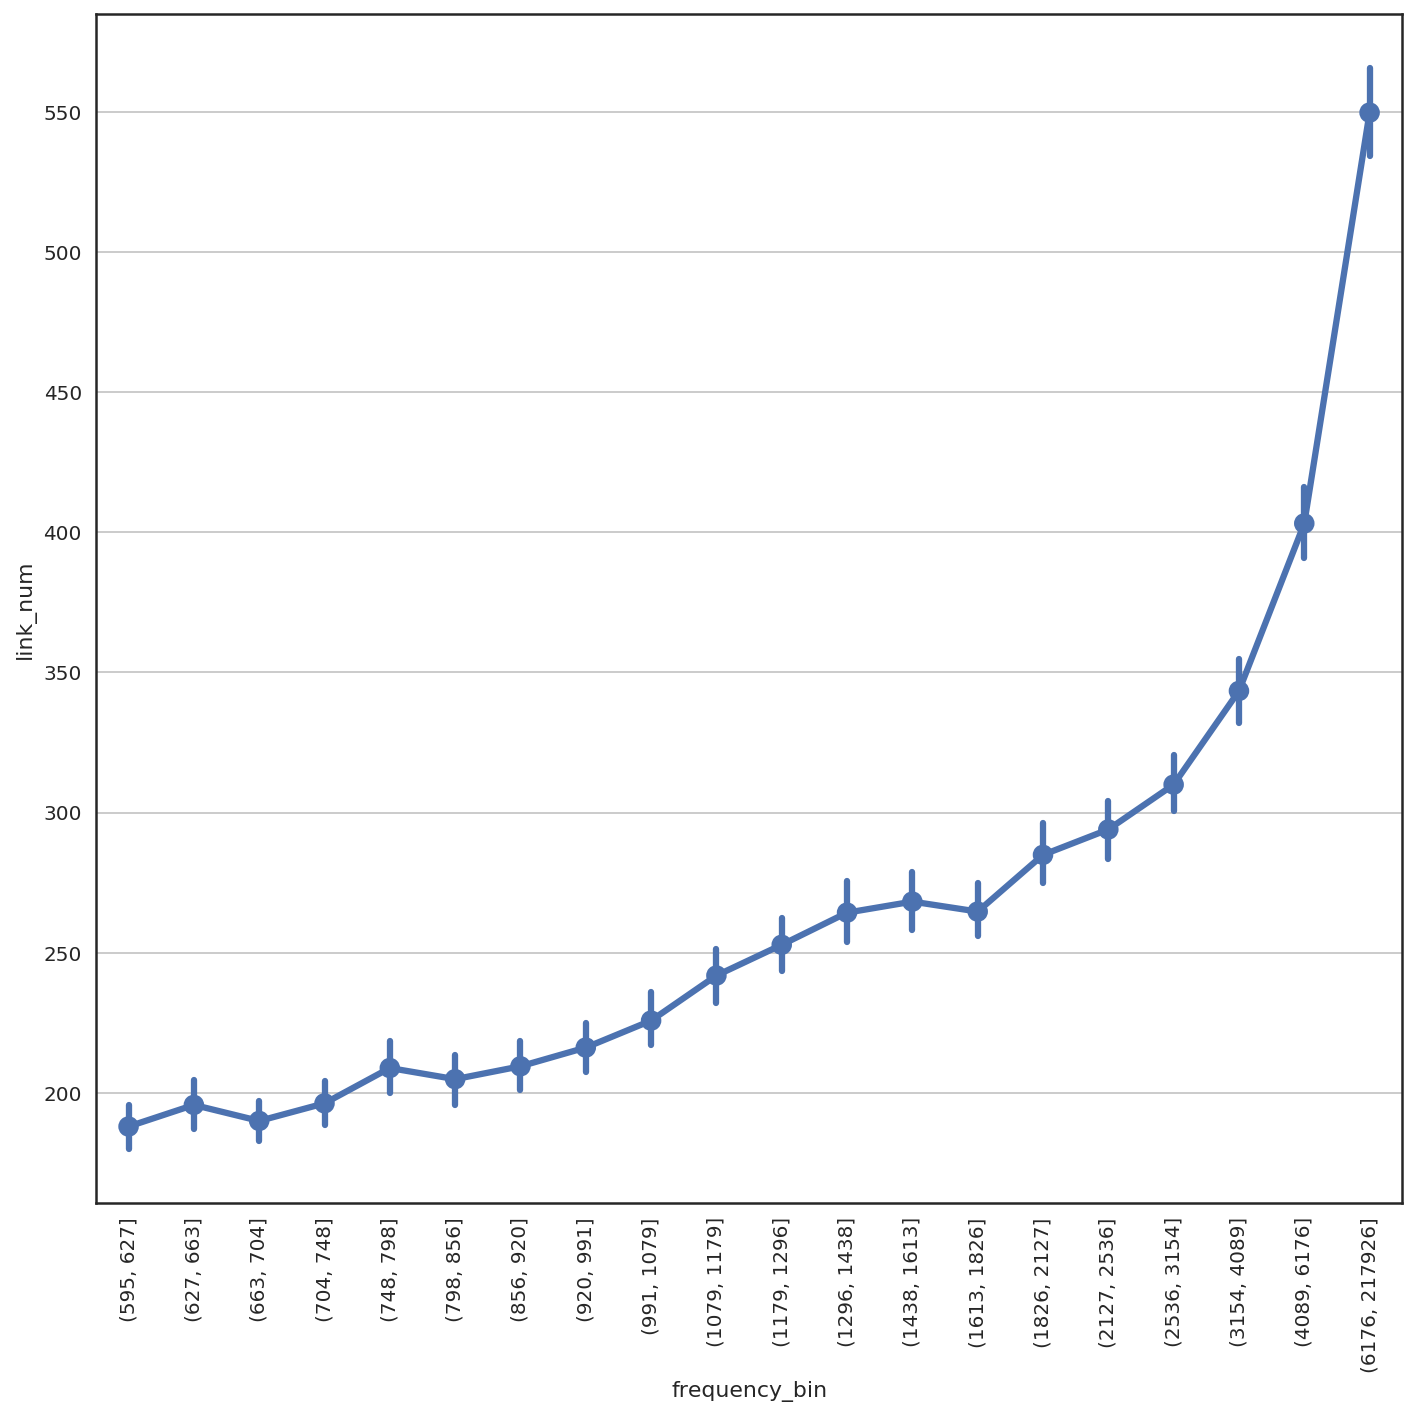

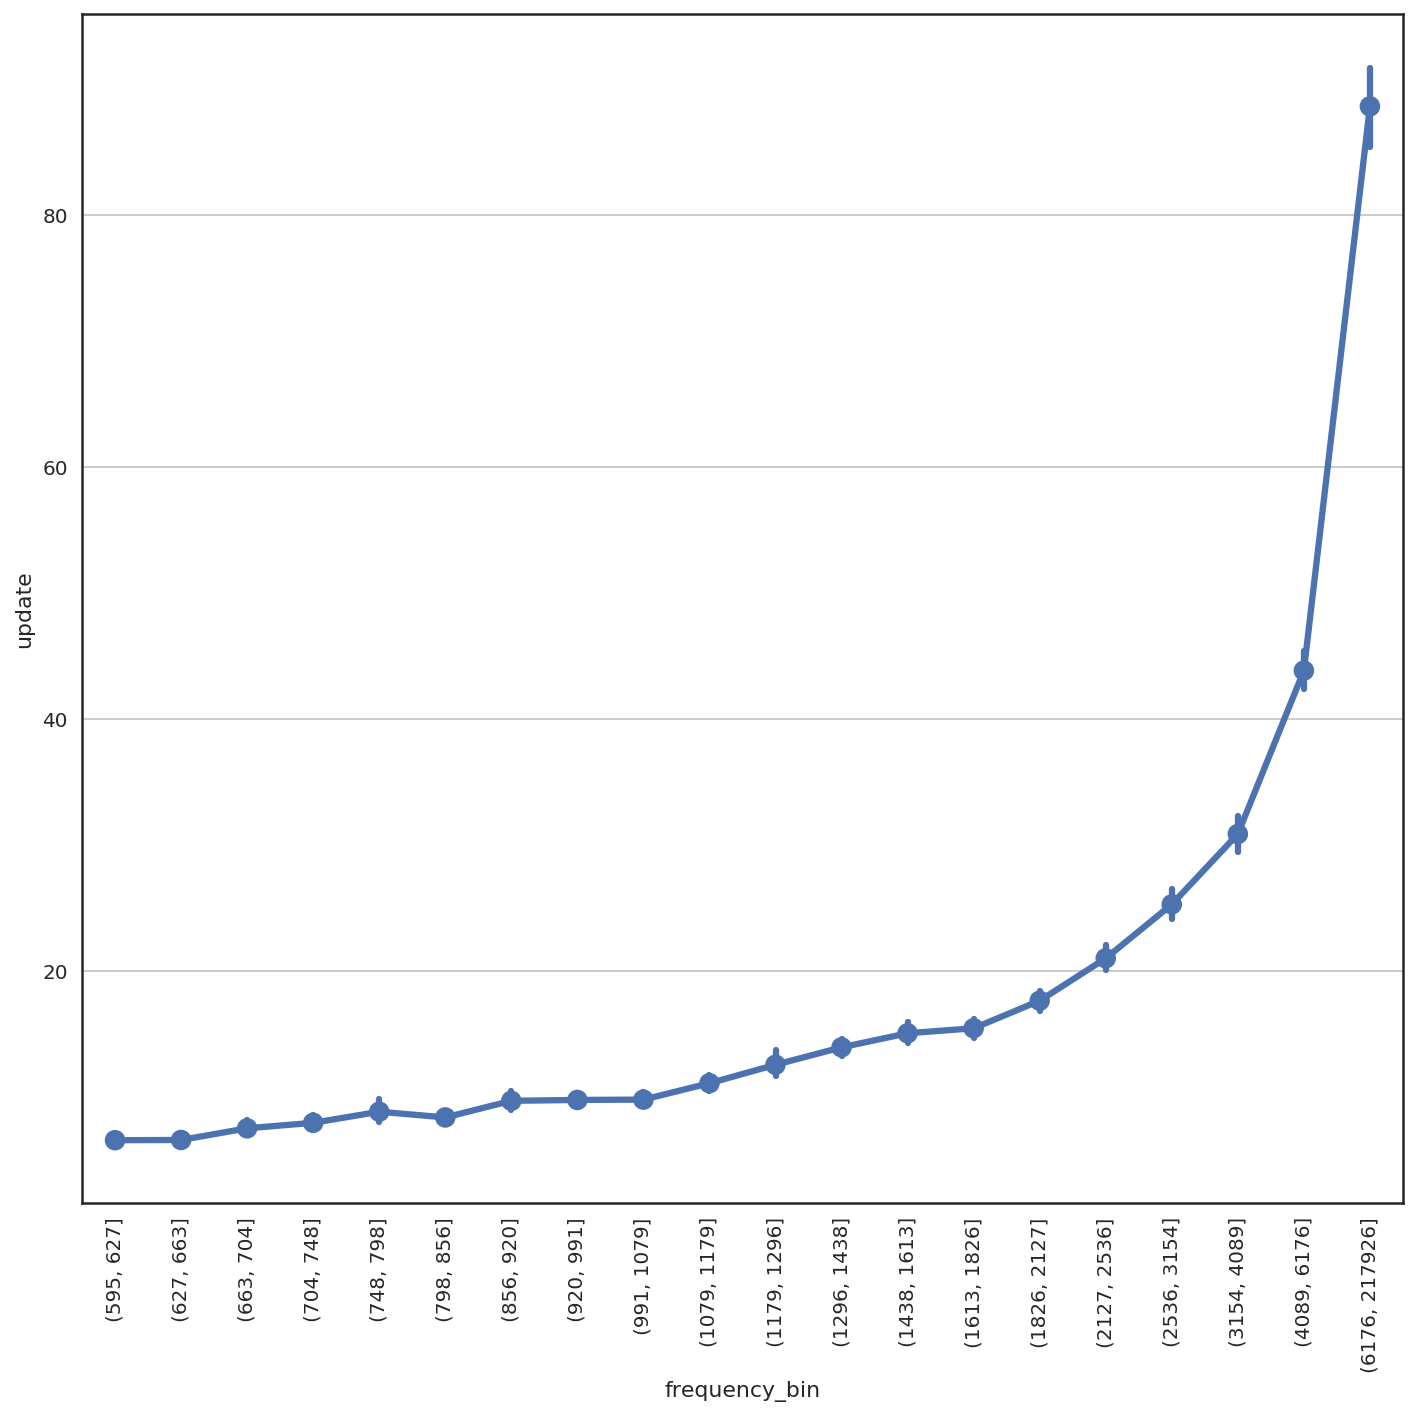

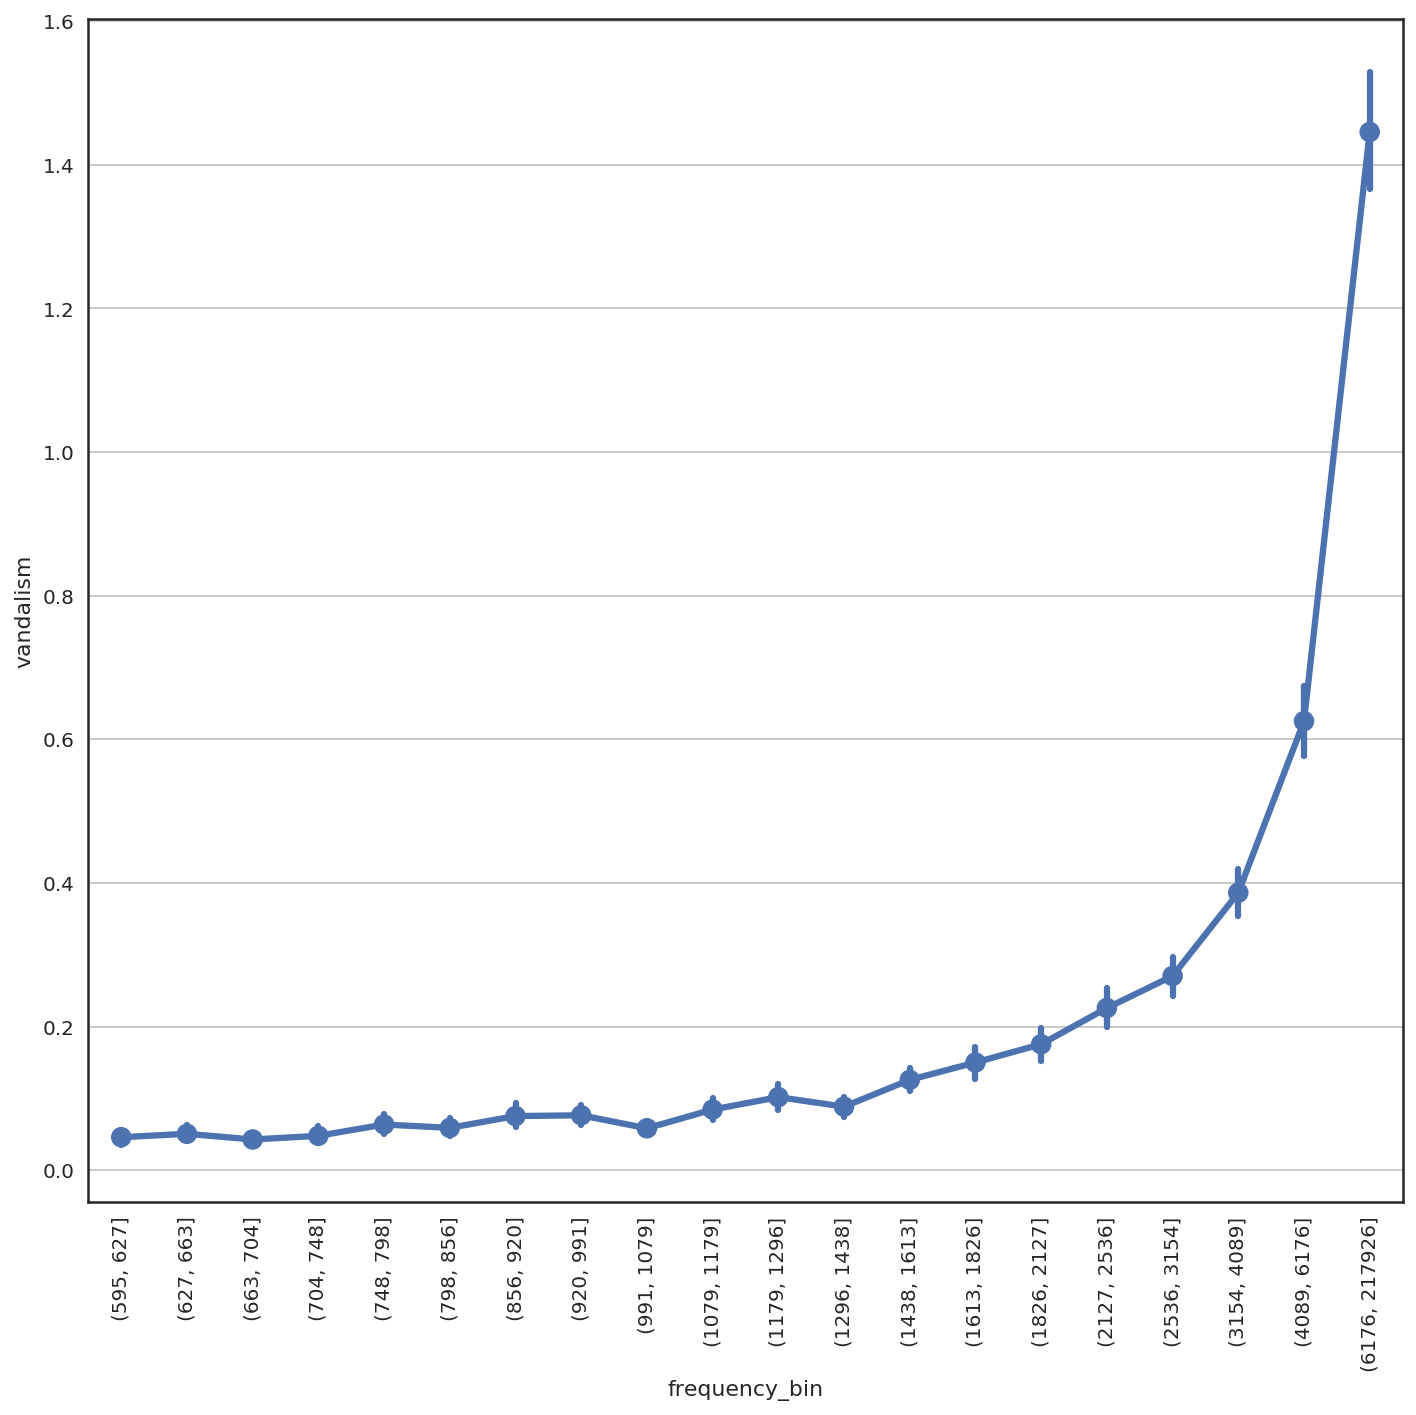

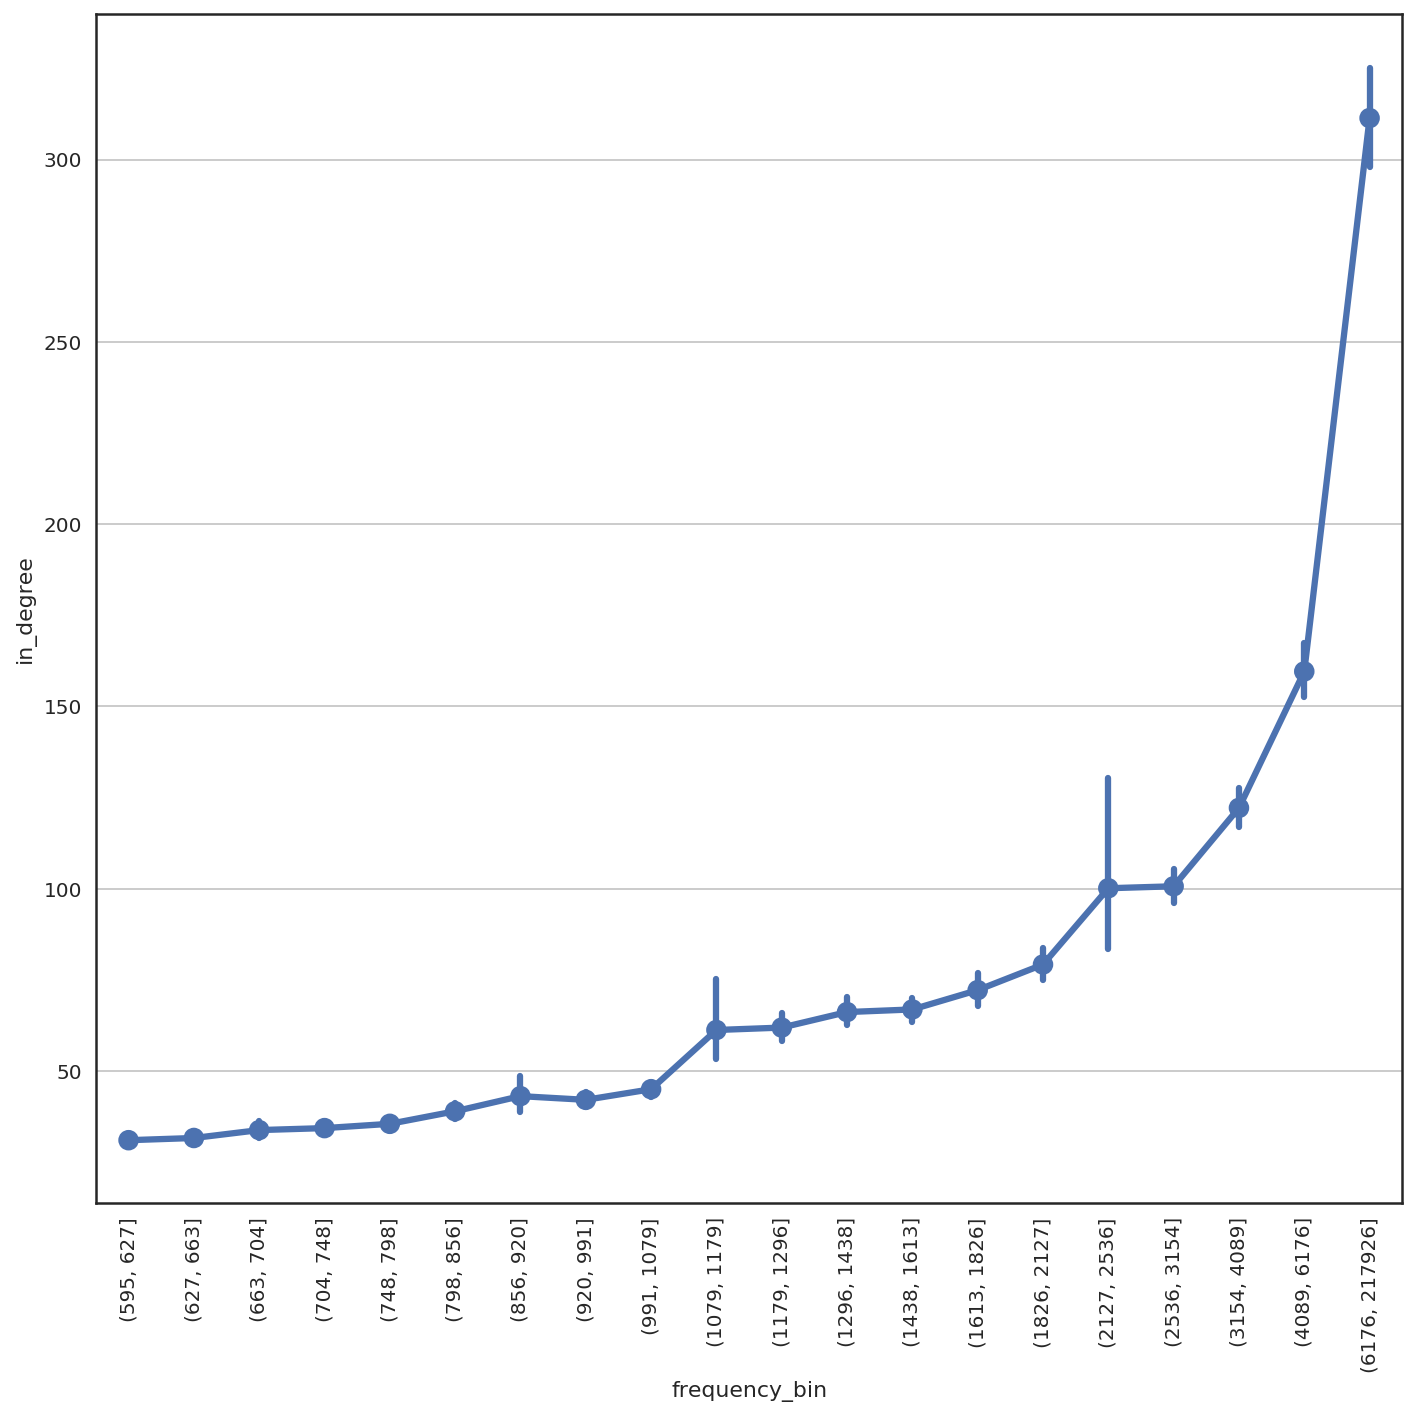

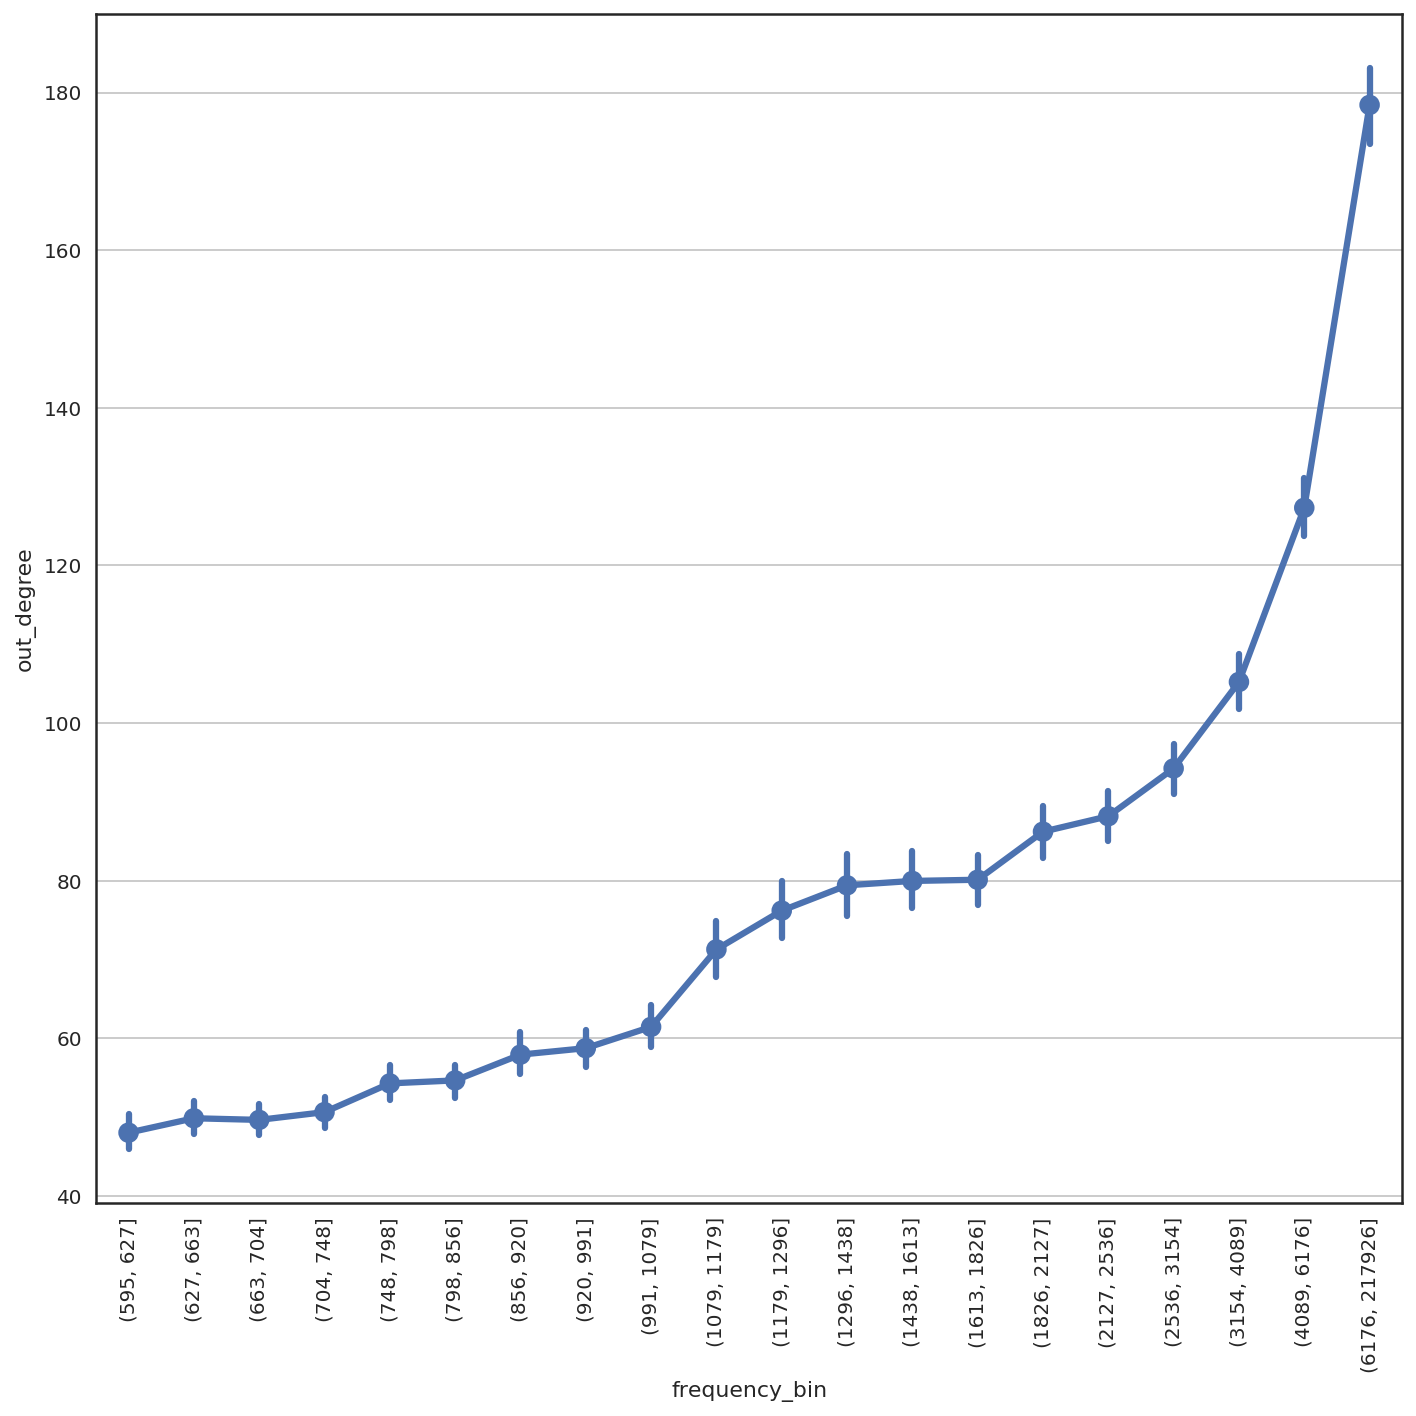

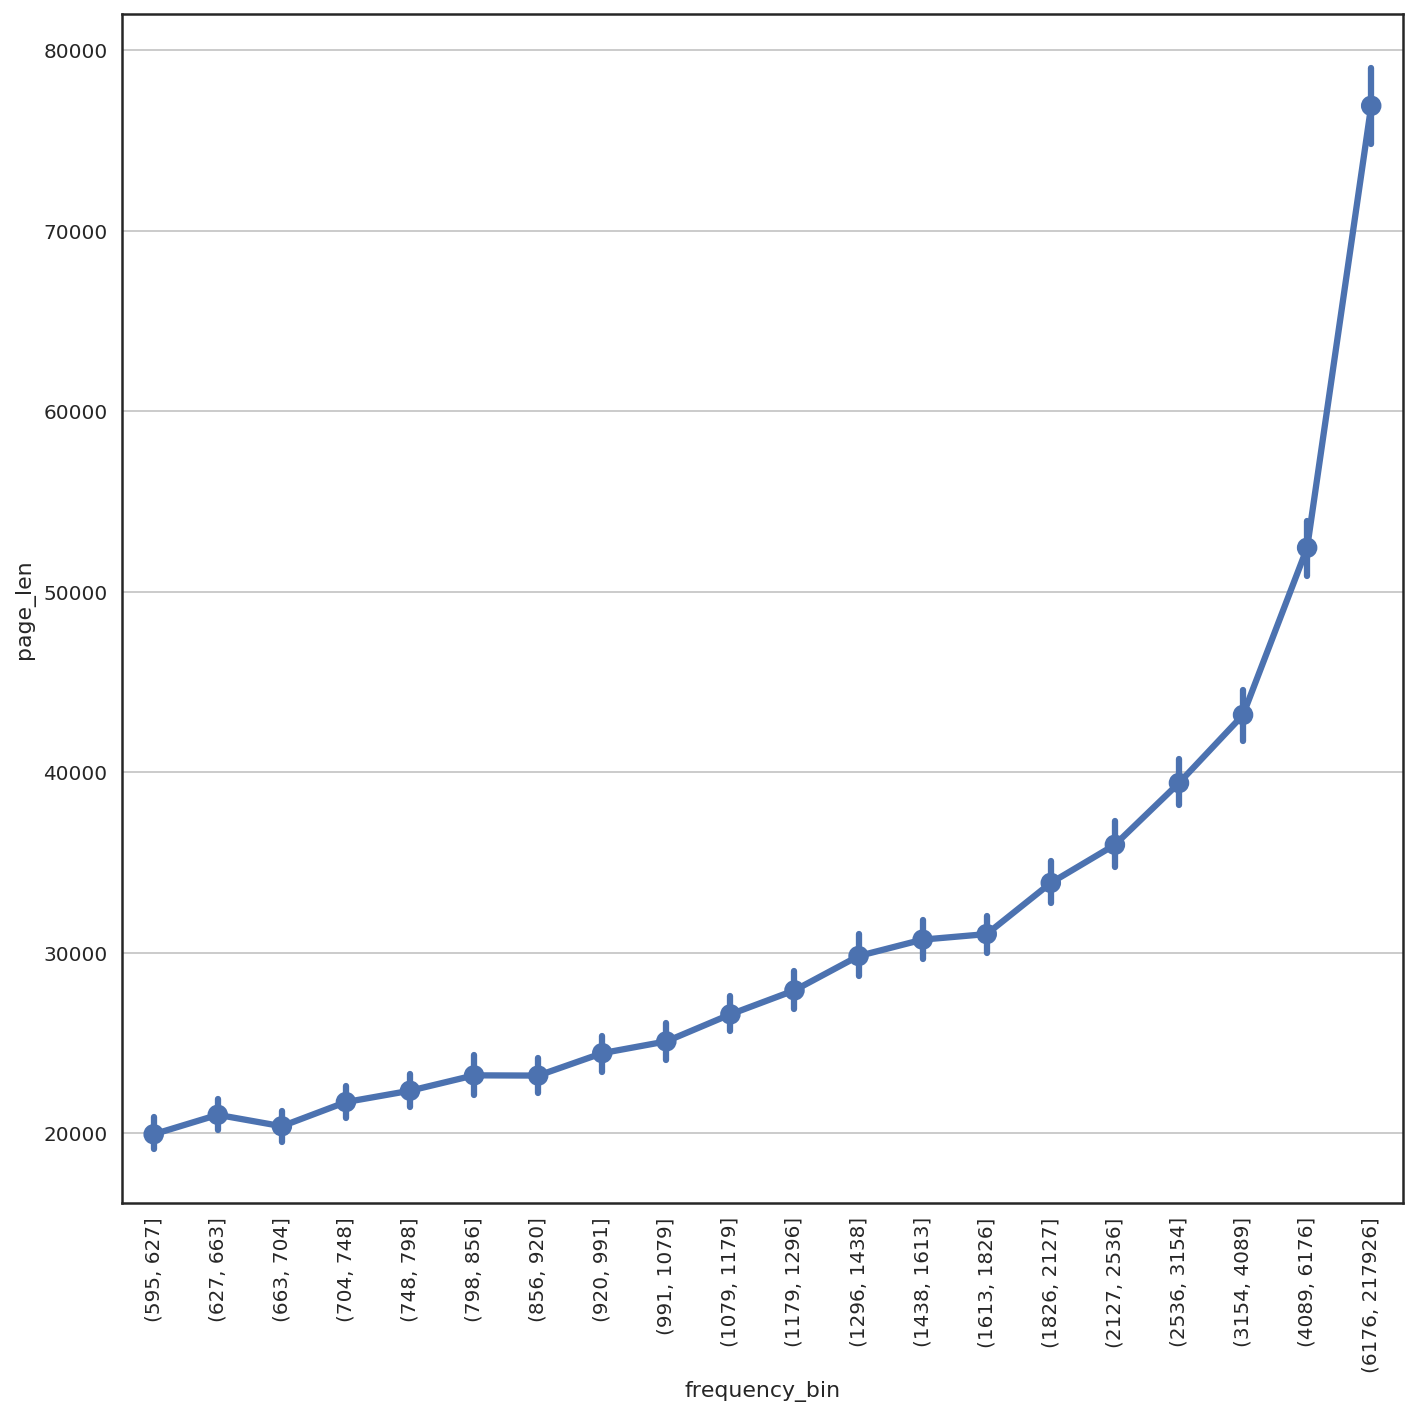

,Meta Data,Pearson’s correlation coefficient,P-value
0,image_num,0.192900,0.0
1,language_num,0.397530,0.0
2,link_num,0.257889,0.0
3,update,0.566016,0.0
4,vandalism,0.381302,0.0
5,in_degree,0.259519,0.0
6,out_degree,0.292718,0.0
7,page_len,0.347605,0.0


In [102]:
data=[]
for column in interested_columns:
    plt.figure(figsize=(10, 10))
    sns.pointplot(x="frequency_bin", y=column, data=visit_count_df)
    v,pv=pearsonr(visit_count_df["frequency"].values, visit_count_df[column].values)
    data.append([column,v,pv])
    plt.xticks(rotation="vertical")
    plt.grid(axis="y")
    plt.tight_layout()
    plt.savefig("./plots/topic1/frequency_vs_%s.png" % column, dpi=400)
    plt.show()
pandas.DataFrame(data,columns=['Meta Data','Pearson’s correlation coefficient','P-value'])

<Figure size 720x720 with 0 Axes>

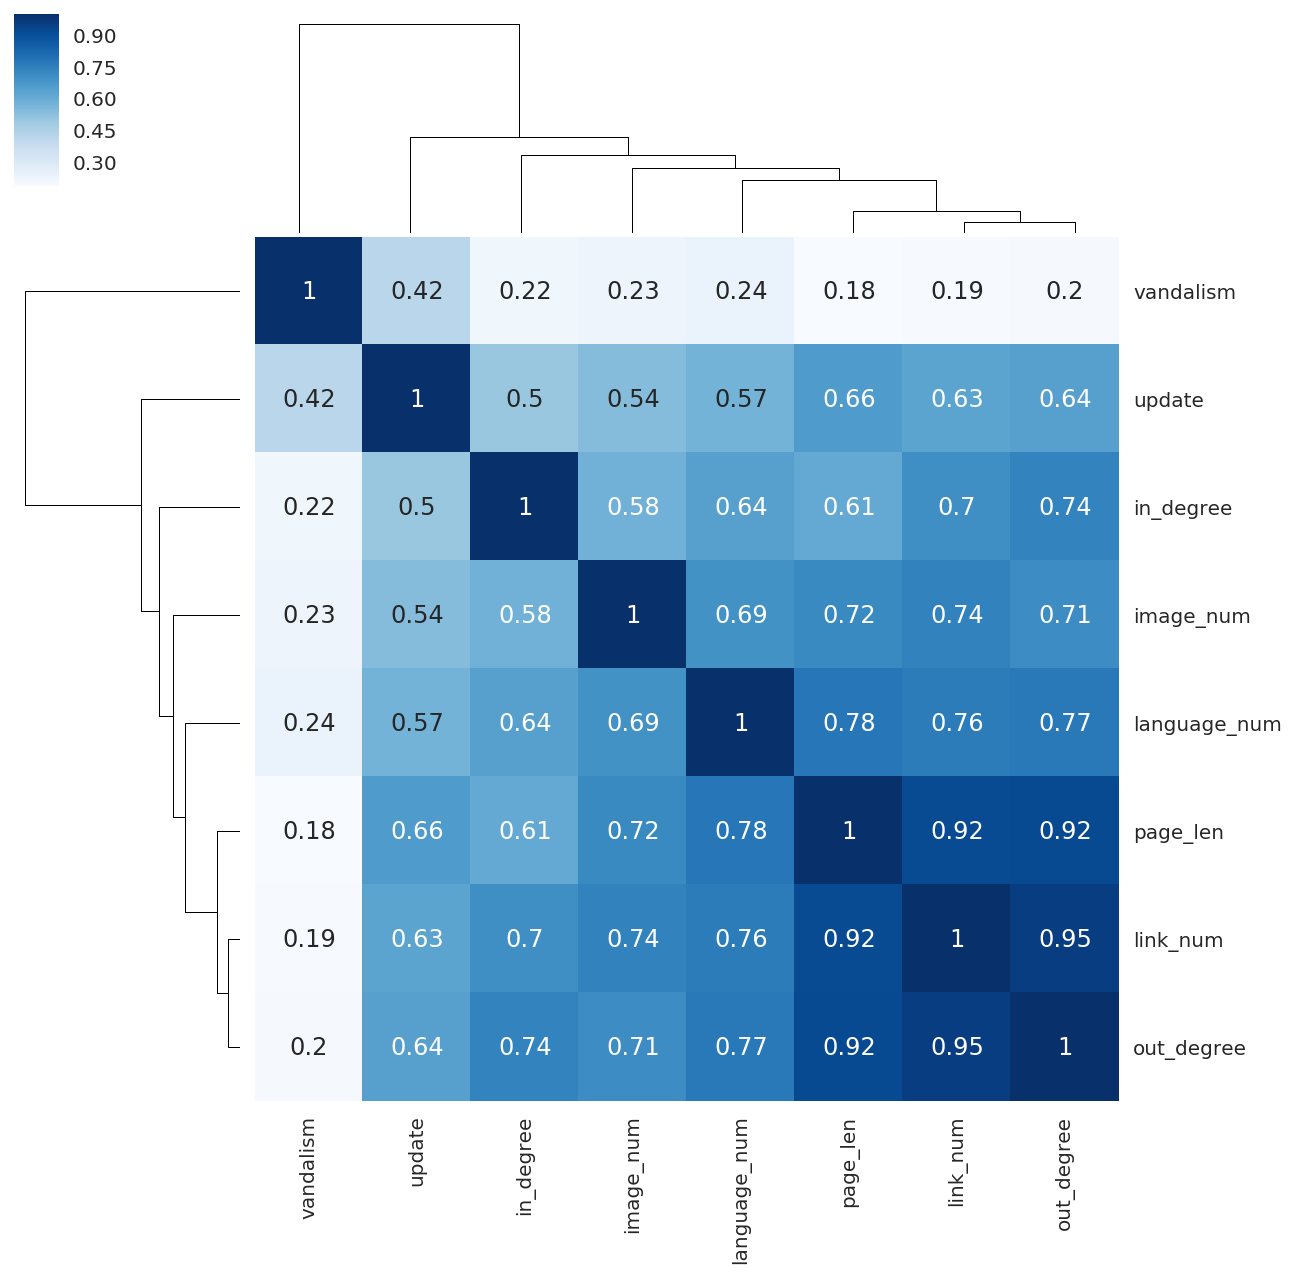

In [88]:
data=visit_count_df[interested_columns].values
data=numpy.log(data+1)
corr=numpy.corrcoef(data,rowvar=False)
corr_df=pandas.DataFrame(corr,columns=interested_columns,index=interested_columns)
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((9,9), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
sns.clustermap(corr_df, cmap='Blues', square=True,annot=True)
plt.savefig("./plots/topic1/corr_matrix.png", dpi=400)
plt.show()

In [77]:
independent_column = [
    'image_num', 'language_num', 'update', 'vandalism',
    'in_degree', 'page_len'
]

<Figure size 720x720 with 0 Axes>

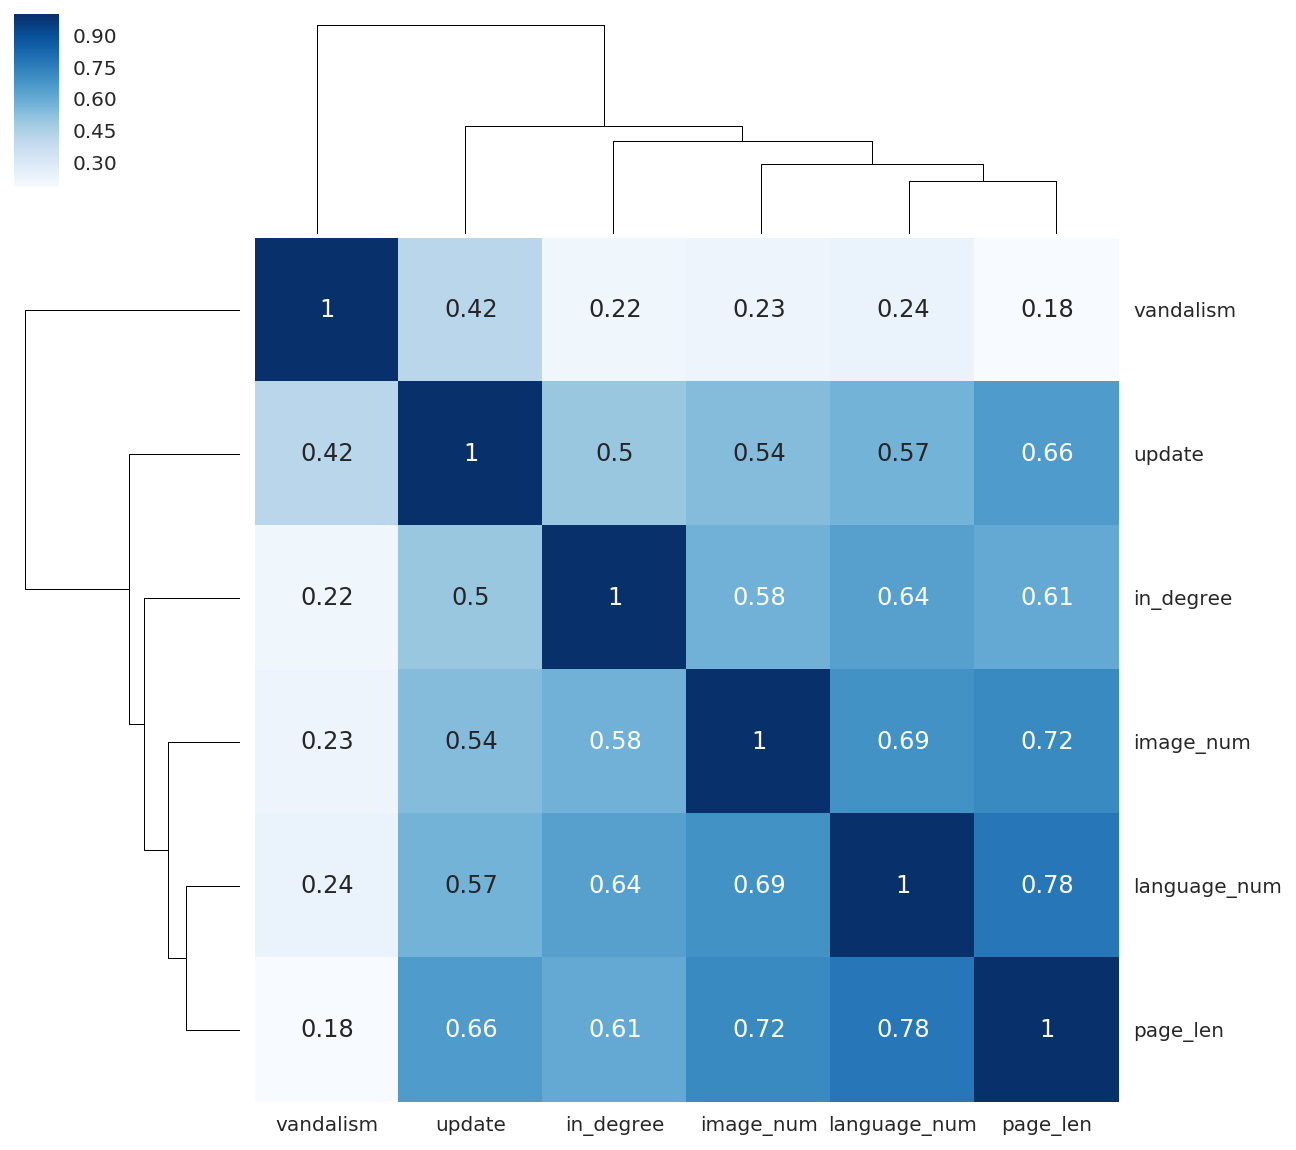

In [98]:
data=visit_count_df[independent_column].values
data=numpy.log(data+1)
corr=numpy.corrcoef(data,rowvar=False)
corr_df=pandas.DataFrame(corr,columns=independent_column,index=independent_column)
plt.figure(figsize=(10,10))
sns.set(style="white")
mask = numpy.zeros((9,9), dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True
sns.clustermap(corr_df, cmap='Blues', square=True,annot=True)
plt.savefig("./plots/topic1/independent_corr_matrix.png", dpi=400)
plt.show()

In [78]:
from sklearn import linear_model
from sklearn import preprocessing

In [117]:
X=visit_count_df[independent_column].values
y=visit_count_df['frequency']
# X=numpy.log(X+1)
X=preprocessing.MinMaxScaler().fit_transform(X)
# y=numpy.log(y)

In [118]:
lr = linear_model.LinearRegression()
lr.fit(X, y)
y_pred=lr.predict(X)

In [119]:
result=pandas.DataFrame({'y':y,'y_pred':y_pred})

In [120]:
result=result[result['y']<30000]
result=result[result['y_pred']<30000]

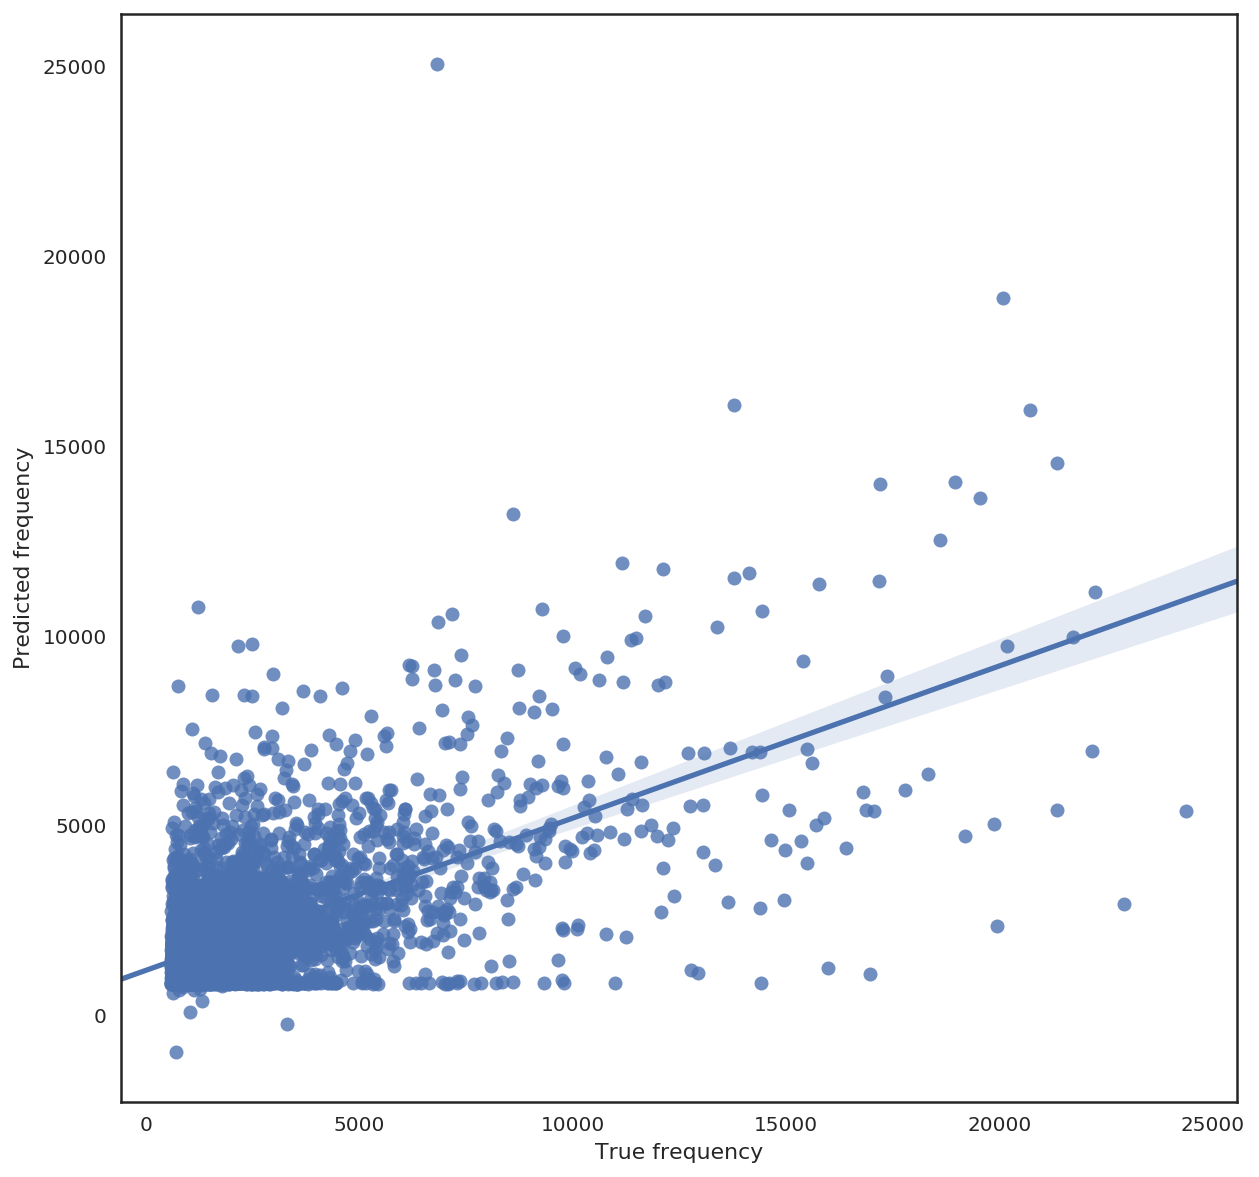

In [121]:
plt.figure(figsize=(10,10))
sns.regplot(x='y',y='y_pred',data=result.sample(frac=0.1))
plt.xlabel('True frequency')
plt.ylabel('Predicted frequency')
plt.savefig('./plots/topic1/Regression.png', dpi=400)
plt.show()

In [122]:
lr.score(X,y)

0.3815402982412857

In [129]:
lr.score?

In [123]:
coef = pandas.DataFrame(
    list(
        zip(independent_column, lr.coef_,
            ['Linear Regression' for _ in range(len(interested_columns))])),
    columns=['Meta Data', 'Coefficient', 'Method'])

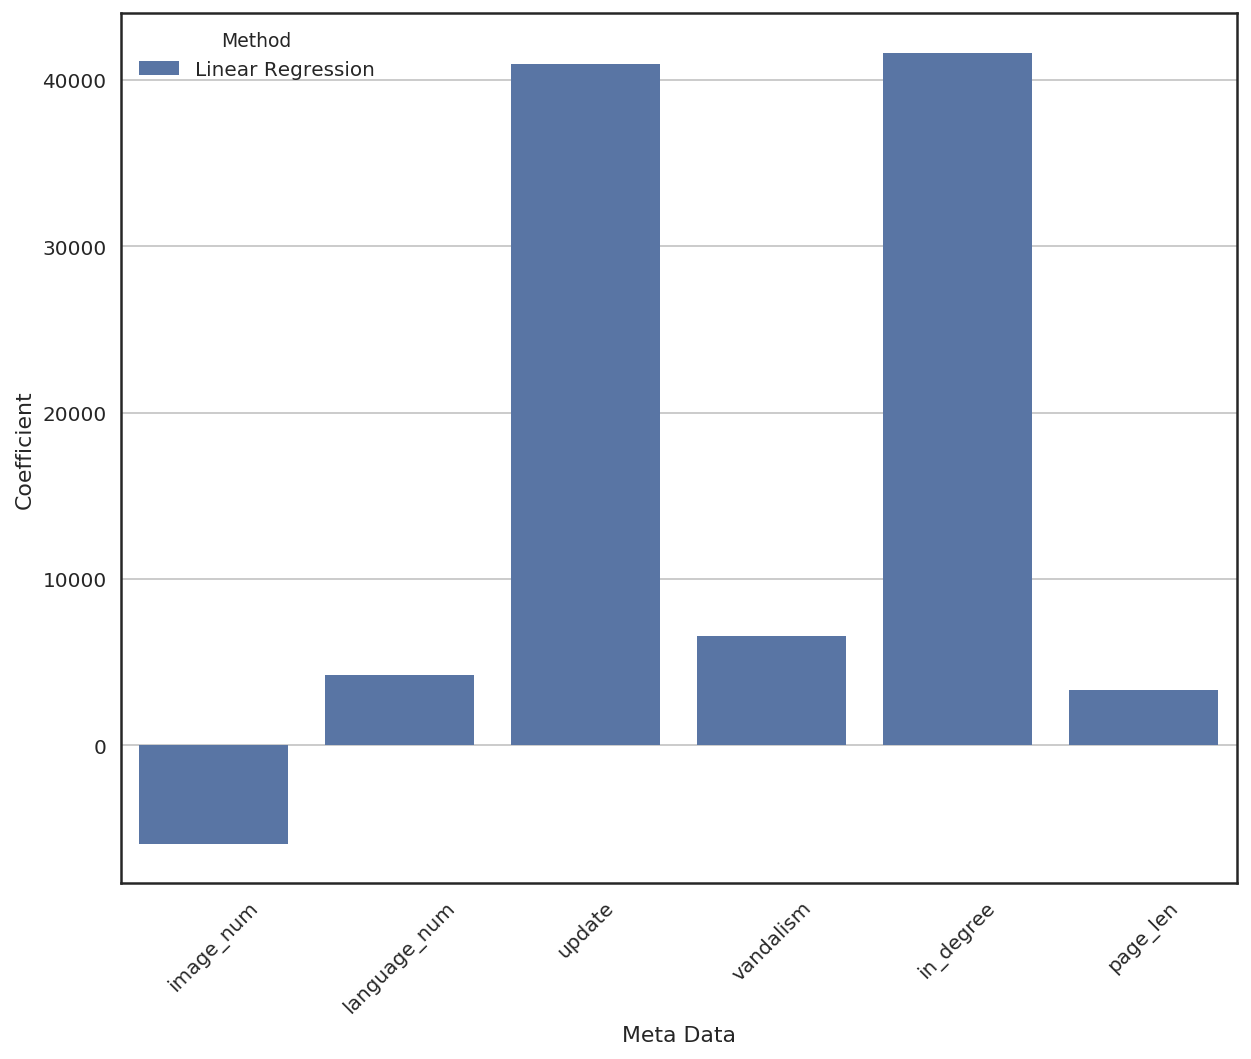

In [124]:
plt.figure(figsize=(10,8))
sns.barplot(x='Meta Data',y='Coefficient',hue='Method',data=coef)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('./plots/topic1/feature_weight.png', dpi=400)
plt.show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


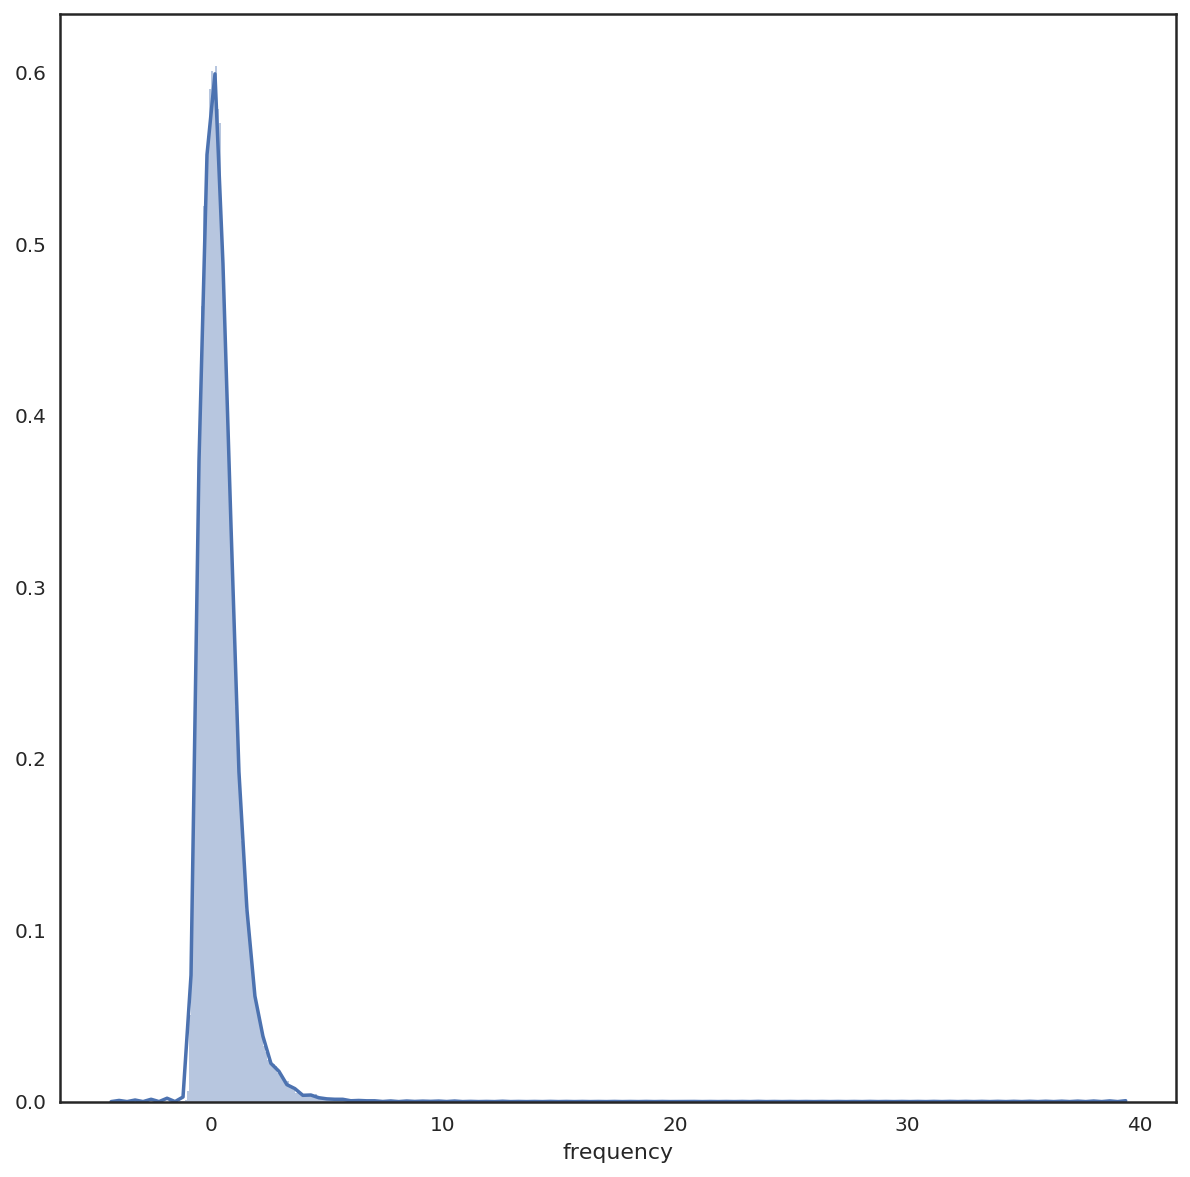

In [127]:
plt.figure(figsize=(10,10))
err=(y_pred-y)/y
sns.distplot(err,bins=500)
plt.savefig('./plots/topic1/error_distribution.png', dpi=400)
plt.show()

In [131]:
from scipy.stats import kstest

In [132]:
kstest(err, 'norm')

KstestResult(statistic=0.22664859139375693, pvalue=0.0)

In [133]:
!zip plots/topic1/topic1.zip plots/topic1/*.png

  adding: plots/topic1/Regression.png (deflated 16%)
  adding: plots/topic1/corr_matrix.png (deflated 17%)
  adding: plots/topic1/error_distribution.png (deflated 41%)
  adding: plots/topic1/feature_weight.png (deflated 32%)
  adding: plots/topic1/frequency_vs_image_num.png (deflated 22%)
  adding: plots/topic1/frequency_vs_in_degree.png (deflated 23%)
  adding: plots/topic1/frequency_vs_language_num.png (deflated 22%)
  adding: plots/topic1/frequency_vs_link_num.png (deflated 21%)
  adding: plots/topic1/frequency_vs_out_degree.png (deflated 22%)
  adding: plots/topic1/frequency_vs_page_len.png (deflated 21%)
  adding: plots/topic1/frequency_vs_update.png (deflated 23%)
  adding: plots/topic1/frequency_vs_vandalism.png (deflated 22%)
  adding: plots/topic1/independent_corr_matrix.png (deflated 25%)
